# **Import Library**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

# **Pra-pemrosesan Data MNIST**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train_A = (x_train.astype('float32') / 255.0)
x_test_A = (x_test.astype('float32') / 255.0)

In [4]:
x_train_A = np.expand_dims(x_train_A, -1)
x_test_A = np.expand_dims(x_test_A, -1)

In [5]:
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print(f"Bentuk x_train (Model A): {x_train_A.shape}")
print(f"Bentuk x_test (Model A): {x_test_A.shape}")

Bentuk x_train (Model A): (60000, 28, 28, 1)
Bentuk x_test (Model A): (10000, 28, 28, 1)


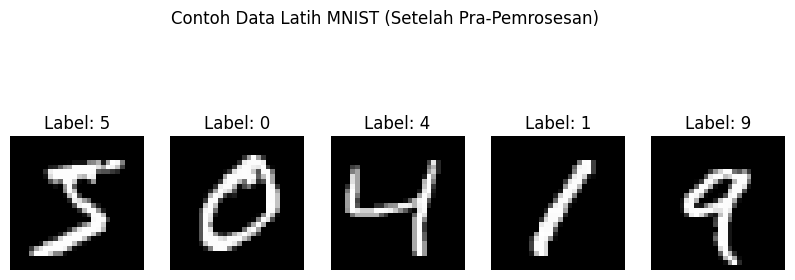

In [6]:
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray') # Ambil dari x_train asli (28,28)
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Contoh Data Latih MNIST (Setelah Pra-Pemrosesan)")
plt.show()

# **Implementasi Model CNN dari Nol**

In [7]:
input_shape_A = (28, 28, 1)

model_A = Sequential([
    # Lapisan Conv2D dan MaxPooling2D (Sesuai instruksi)
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape_A),
    MaxPooling2D(pool_size=(2, 2)),

    # Lapisan Conv2D dan MaxPooling2D kedua
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Lapisan Flatten
    Flatten(),

    # Lapisan Dense
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Lapisan Output (Softmax)
    Dense(num_classes, activation='softmax')
])

# Kompilasi model
model_A.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_A.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
batch_size = 128
epochs = 10

print("Memulai pelatihan Model A...")
history_A = model_A.fit(x_train_A, y_train_cat,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test_A, y_test_cat))
print("Pelatihan Model A selesai.")

Memulai pelatihan Model A...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.7992 - loss: 0.6312 - val_accuracy: 0.9808 - val_loss: 0.0581
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.9702 - loss: 0.1009 - val_accuracy: 0.9876 - val_loss: 0.0378
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.9792 - loss: 0.0690 - val_accuracy: 0.9888 - val_loss: 0.0353
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.9838 - loss: 0.0559 - val_accuracy: 0.9898 - val_loss: 0.0311
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.9861 - loss: 0.0484 - val_accuracy: 0.9911 - val_loss: 0.0262
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.9878 - loss: 0.0411 - val_accuracy: 0.9903 - val_loss: 0.0300
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.9870 - loss: 0.0378 - val_accuracy: 0.9919 - val_loss: 0.0248
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accur

Evaluasi Model A pada data Uji MNIST:
Test Loss (MNIST): 0.0228
Test Accuracy (MNIST): 99.31%


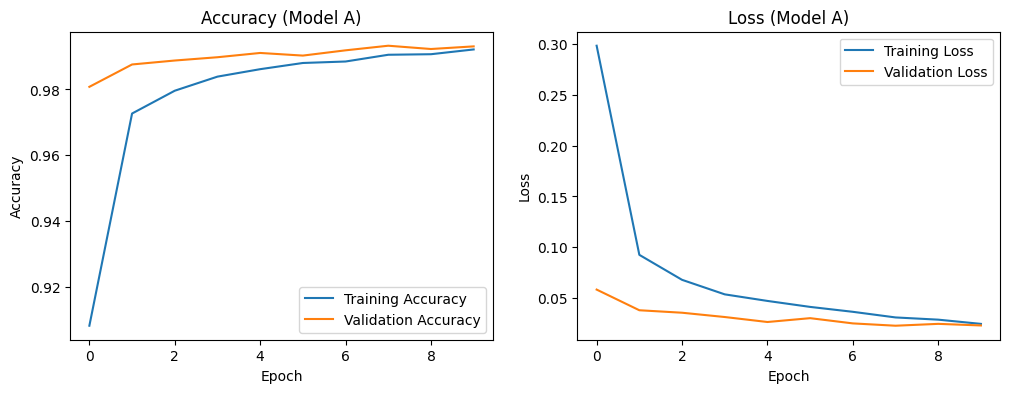

In [9]:
print("Evaluasi Model A pada data Uji MNIST:")
score_A_test = model_A.evaluate(x_test_A, y_test_cat, verbose=0)
print(f"Test Loss (MNIST): {score_A_test[0]:.4f}")
print(f"Test Accuracy (MNIST): {score_A_test[1]*100:.2f}%")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_A.history['accuracy'], label='Training Accuracy')
plt.plot(history_A.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy (Model A)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_A.history['loss'], label='Training Loss')
plt.plot(history_A.history['val_loss'], label='Validation Loss')
plt.title('Loss (Model A)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Evaluasi Model CNN dari Nol dengan Tulisan Tangan Sendiri**

In [10]:
def preprocess_image_for_A(image_path):
    img = Image.open(image_path).convert('L')
    img_np = np.array(img)
    img_inverted = cv2.bitwise_not(img_np)
    img_resized = cv2.resize(img_inverted, (28, 28), interpolation=cv2.INTER_AREA)
    img_normalized = img_resized.astype('float32') / 255.0
    img_reshaped = np.expand_dims(img_normalized, axis=-1)
    img_reshaped = np.expand_dims(img_reshaped, axis=0)
    return img_reshaped, img_resized

Visualisasi Citra Tulisan Tangan (1, 5, 2) Setelah Pra-pemrosesan (Model A):


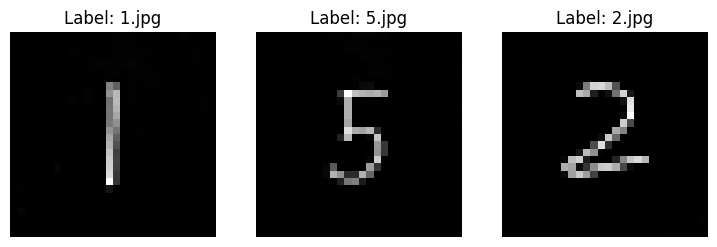

In [11]:
demo_files = ['1.jpg', '5.jpg', '2.jpg']
demo_images_processed = []
demo_images_for_pred_A = {}

plt.figure(figsize=(9, 3))
print("Visualisasi Citra Tulisan Tangan (1, 5, 2) Setelah Pra-pemrosesan (Model A):")

for i, file_path in enumerate(demo_files):
    try:
        processed_img_for_pred, processed_img_for_viz = preprocess_image_for_A(file_path)
        demo_images_processed.append(processed_img_for_viz)
        demo_images_for_pred_A[file_path] = processed_img_for_pred

        plt.subplot(1, 3, i + 1)
        plt.imshow(processed_img_for_viz, cmap='gray')
        plt.title(f"Label: {file_path}")
        plt.axis('off')
    except FileNotFoundError:
        print(f"File '{file_path}' tidak ditemukan. Silakan unggah file tersebut.")
        break
plt.show()

**Visualisasi 30 Citra Tulisan Tangan**

Memproses 30 citra tulisan tangan untuk Model A...


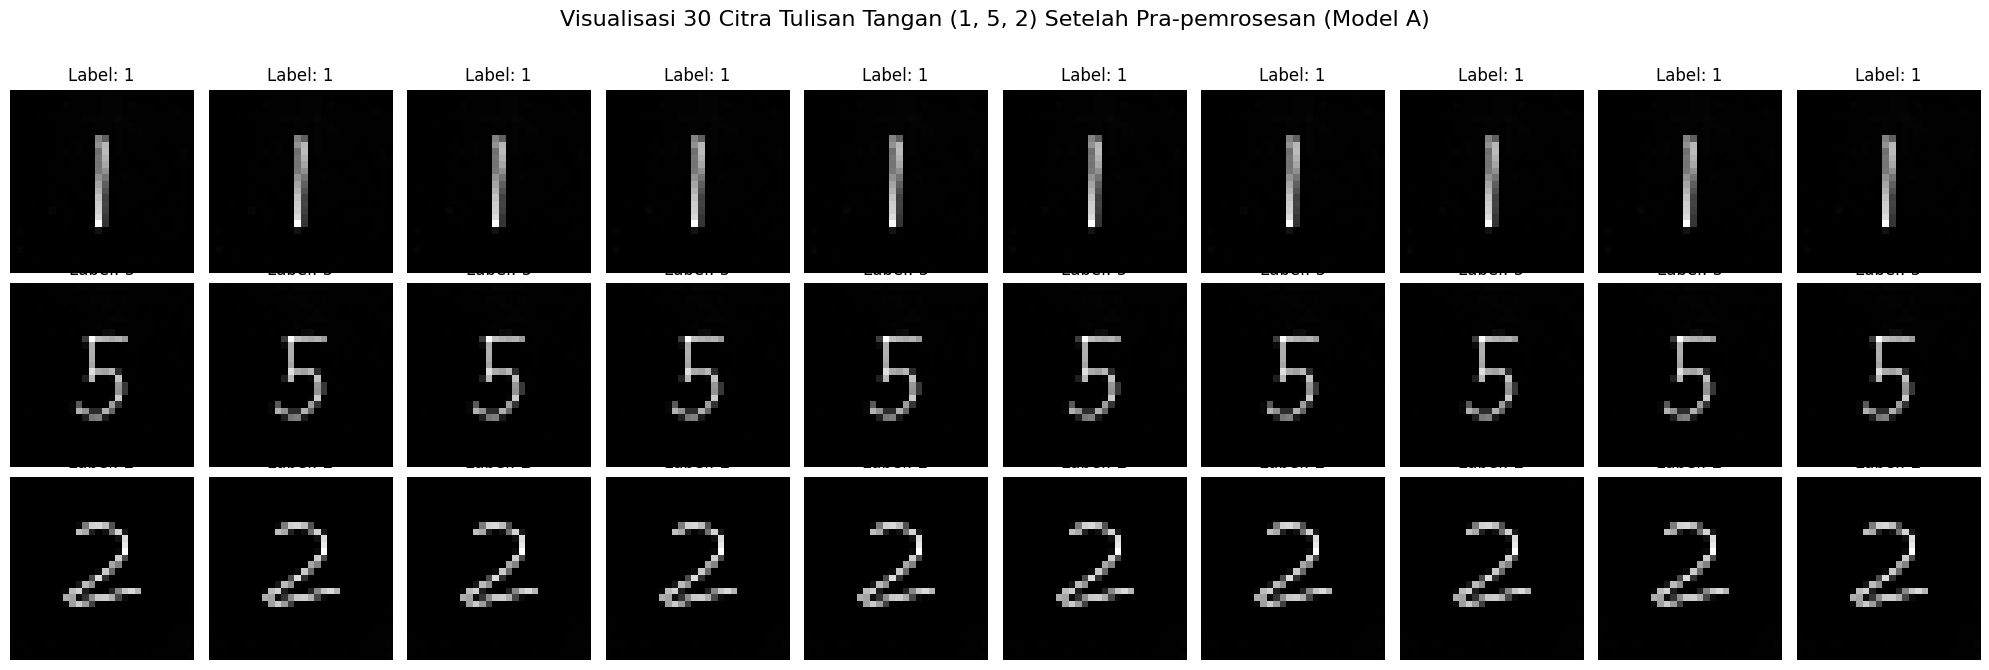

In [12]:
filenames = []
true_labels = []
for i in range(1, 11): filenames.append(f"1_{i}.jpg"); true_labels.append(1)
for i in range(1, 11): filenames.append(f"5_{i}.jpg"); true_labels.append(5)
for i in range(1, 11): filenames.append(f"2_{i}.jpg"); true_labels.append(2)

demo_images_processed_viz = []
demo_images_for_pred_A = {}

print("Memproses 30 citra tulisan tangan untuk Model A...")

for file_path in filenames:
    try:
        processed_img_for_pred, processed_img_for_viz = preprocess_image_for_A(file_path)
        demo_images_processed_viz.append(processed_img_for_viz)
        demo_images_for_pred_A[file_path] = processed_img_for_pred
    except FileNotFoundError:
        print(f"File {file_path} tidak ditemukan! Pastikan 30 file sudah diunggah.")
        demo_images_processed_viz = []
        break

if demo_images_processed_viz:
    plt.figure(figsize=(20, 7))
    for i in range(len(demo_images_processed_viz)):
        plt.subplot(3, 10, i + 1)
        plt.imshow(demo_images_processed_viz[i], cmap='gray')
        plt.title(f"Label: {true_labels[i]}")
        plt.axis('off')

    plt.suptitle("Visualisasi 30 Citra Tulisan Tangan (1, 5, 2) Setelah Pra-pemrosesan (Model A)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [13]:
correct_predictions_A = 0
total_images = len(filenames)

if total_images > 0 and len(demo_images_for_pred_A) == total_images:
    print("--- Hasil Prediksi Model A (Tulisan Tangan NIM 1, 5, 2) ---")

    for i, (file_path, true_label) in enumerate(zip(filenames, true_labels)):
        img_to_predict = demo_images_for_pred_A[file_path]

        prediction = model_A.predict(img_to_predict, verbose=0)
        predicted_class = np.argmax(prediction)

        status = "Benar" if predicted_class == true_label else "Salah"
        if status == "Benar":
            correct_predictions_A += 1

        print(f"Citra ke-{i+1} ({file_path}, Label: {true_label}): Prediksi Model A: {predicted_class} ({status})")

    accuracy_A_custom = (correct_predictions_A / total_images) * 100
    print("-" * 40)
    print(f"Total Prediksi Benar (Model A): {correct_predictions_A} / {total_images}")
    print(f"Akurasi Model A (Tulisan Tangan): {accuracy_A_custom:.2f}%")

--- Hasil Prediksi Model A (Tulisan Tangan NIM 1, 5, 2) ---
Citra ke-1 (1_1.jpg, Label: 1): Prediksi Model A: 1 (Benar)
Citra ke-2 (1_2.jpg, Label: 1): Prediksi Model A: 1 (Benar)
Citra ke-3 (1_3.jpg, Label: 1): Prediksi Model A: 1 (Benar)
Citra ke-4 (1_4.jpg, Label: 1): Prediksi Model A: 1 (Benar)
Citra ke-5 (1_5.jpg, Label: 1): Prediksi Model A: 1 (Benar)
Citra ke-6 (1_6.jpg, Label: 1): Prediksi Model A: 1 (Benar)
Citra ke-7 (1_7.jpg, Label: 1): Prediksi Model A: 1 (Benar)
Citra ke-8 (1_8.jpg, Label: 1): Prediksi Model A: 1 (Benar)
Citra ke-9 (1_9.jpg, Label: 1): Prediksi Model A: 1 (Benar)
Citra ke-10 (1_10.jpg, Label: 1): Prediksi Model A: 1 (Benar)
Citra ke-11 (5_1.jpg, Label: 5): Prediksi Model A: 5 (Benar)
Citra ke-12 (5_2.jpg, Label: 5): Prediksi Model A: 5 (Benar)
Citra ke-13 (5_3.jpg, Label: 5): Prediksi Model A: 5 (Benar)
Citra ke-14 (5_4.jpg, Label: 5): Prediksi Model A: 5 (Benar)
Citra ke-15 (5_5.jpg, Label: 5): Prediksi Model A: 5 (Benar)
Citra ke-16 (5_6.jpg, Label: 5): 

# **Implementasi Model Transfer Learning**

In [14]:
x_train_B_resized = tf.image.resize(x_train_A, (32, 32))
x_test_B_resized = tf.image.resize(x_test_A, (32, 32))

In [15]:
x_train_B = tf.image.grayscale_to_rgb(x_train_B_resized)
x_test_B = tf.image.grayscale_to_rgb(x_test_B_resized)

print(f"Bentuk x_train baru untuk Model B: {x_train_B.shape}")

Bentuk x_train baru untuk Model B: (60000, 32, 32, 3)


In [16]:
input_shape_B = (32, 32, 3)

base_model = VGG16(weights='imagenet',
                     include_top=False,
                     input_shape=input_shape_B)

base_model.trainable = False

inputs = Input(shape=input_shape_B)
x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model_B = Model(inputs, outputs)

model_B.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_B.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
print("Memulai pelatihan Model B (Transfer Learning)...")
history_B = model_B.fit(x_train_B, y_train_cat,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test_B, y_test_cat))
print("Pelatihan Model B selesai.")

Memulai pelatihan Model B (Transfer Learning)...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 774s 2s/step - accuracy: 0.6992 - loss: 0.9530 - val_accuracy: 0.9387 - val_loss: 0.2162
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 773s 2s/step - accuracy: 0.9224 - loss: 0.2577 - val_accuracy: 0.9527 - val_loss: 0.1546
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 771s 2s/step - accuracy: 0.9392 - loss: 0.1945 - val_accuracy: 0.9590 - val_loss: 0.1305
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 735s 2s/step - accuracy: 0.9489 - loss: 0.1668 - val_accuracy: 0.9616 - val_loss: 0.1166
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 775s 2s/step - accuracy: 0.9528 - loss: 0.1483 - val_accuracy: 0.9671 - val_loss: 0.1008
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 771s 2s/step - accuracy: 0.9588 - loss: 0.1316 - val_accuracy: 0.9686 - val_loss: 0.0938
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 769s 2s/step - accuracy: 0.9604 - loss: 0.1269 - val_accuracy: 0.9688 - val_loss: 0.0939
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 730s 2s/

Evaluasi Model B pada data Uji MNIST:
Test Loss (MNIST): 0.0801
Test Accuracy (MNIST): 97.42%


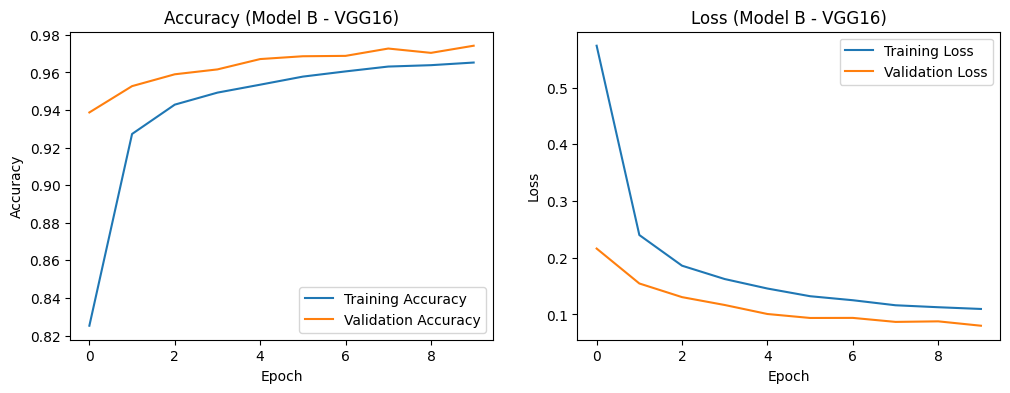

In [18]:
print("Evaluasi Model B pada data Uji MNIST:")
score_B_test = model_B.evaluate(x_test_B, y_test_cat, verbose=0)
print(f"Test Loss (MNIST): {score_B_test[0]:.4f}")
print(f"Test Accuracy (MNIST): {score_B_test[1]*100:.2f}%")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_B.history['accuracy'], label='Training Accuracy')
plt.plot(history_B.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy (Model B - VGG16)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_B.history['loss'], label='Training Loss')
plt.plot(history_B.history['val_loss'], label='Validation Loss')
plt.title('Loss (Model B - VGG16)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Evaluasi Model Transfer Learning**

In [19]:
def preprocess_image_for_B(image_path):
    img = Image.open(image_path).convert('L')
    img_np = np.array(img)
    img_inverted = cv2.bitwise_not(img_np)

    img_resized = cv2.resize(img_inverted, (32, 32), interpolation=cv2.INTER_AREA)

    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
    img_normalized = img_rgb.astype('float32') / 255.0

    img_reshaped = np.expand_dims(img_normalized, axis=0)
    return img_reshaped

In [20]:
correct_predictions_B = 0
total_images = len(filenames)
demo_images_for_pred_B = {}

print("--- Hasil Prediksi Model B (Transfer Learning) pada 30 Citra Tulisan Tangan ---")

for i, (file_path, true_label) in enumerate(zip(filenames, true_labels)):
    try:
        if file_path in demo_images_for_pred_B:
             img_to_predict = demo_images_for_pred_B[file_path]
        else:
            img_to_predict = preprocess_image_for_B(file_path)
            if file_path in demo_files:
                demo_images_for_pred_B[file_path] = img_to_predict

        prediction = model_B.predict(img_to_predict, verbose=0)
        predicted_class = np.argmax(prediction)

        status = "Benar" if predicted_class == true_label else "Salah"
        if status == "Benar":
            correct_predictions_B += 1

        print(f"Citra ke-{i+1} (Label: {true_label}): Prediksi Model B: {predicted_class} ({status})")

    except FileNotFoundError:
        print(f"File {file_path} tidak ditemukan. Evaluasi dibatalkan.")
        total_images = 0
        break

if total_images > 0:
    accuracy_B_custom = (correct_predictions_B / total_images) * 100
    print("-" * 40)
    print(f"Total Prediksi Benar (Model B): {correct_predictions_B} / {total_images}")
    print(f"Akurasi Model B (Tulisan Tangan): {accuracy_B_custom:.2f}%")

--- Hasil Prediksi Model B (Transfer Learning) pada 30 Citra Tulisan Tangan ---
Citra ke-1 (Label: 1): Prediksi Model B: 1 (Benar)
Citra ke-2 (Label: 1): Prediksi Model B: 1 (Benar)
Citra ke-3 (Label: 1): Prediksi Model B: 1 (Benar)
Citra ke-4 (Label: 1): Prediksi Model B: 1 (Benar)
Citra ke-5 (Label: 1): Prediksi Model B: 1 (Benar)
Citra ke-6 (Label: 1): Prediksi Model B: 1 (Benar)
Citra ke-7 (Label: 1): Prediksi Model B: 1 (Benar)
Citra ke-8 (Label: 1): Prediksi Model B: 1 (Benar)
Citra ke-9 (Label: 1): Prediksi Model B: 1 (Benar)
Citra ke-10 (Label: 1): Prediksi Model B: 1 (Benar)
Citra ke-11 (Label: 5): Prediksi Model B: 5 (Benar)
Citra ke-12 (Label: 5): Prediksi Model B: 5 (Benar)
Citra ke-13 (Label: 5): Prediksi Model B: 5 (Benar)
Citra ke-14 (Label: 5): Prediksi Model B: 5 (Benar)
Citra ke-15 (Label: 5): Prediksi Model B: 5 (Benar)
Citra ke-16 (Label: 5): Prediksi Model B: 5 (Benar)
Citra ke-17 (Label: 5): Prediksi Model B: 5 (Benar)
Citra ke-18 (Label: 5): Prediksi Model B: 5 (